# 2. Using the Interval Indexers

As was the case with the previous script we'll define the coding type first in order to maintain backwards 
compatibility with Python 2.7.x. 

In [1]:
# -*- coding: utf-8 -*-

Next, we initialize and import the ```Importer``` method as we did in the 
[1_Getting_Started_with_VIS.ipynb](1_Getting_Started_with_VIS.ipynb) section. 

In [2]:
# Adding the VIS Framework Importer method to our script:
from vis.models.indexed_piece import Importer

Importing a scores is the same procedure as well in our analysis script.

In [3]:
# Importing a symbolic music file into the analysis script:
chant = Importer('scores/monophonic/symbolic/Book-1_Ave-Maria-benedicta-tu_p-146.xml')

However, at this point we need to differentiate what types of intervals we want to look at. Our two interval options are: (1) vertical, and (2) horizontal. The former option evaluates interval types between two or more parts that are simultaneously occurring, while the latter evaluates interval types as they are successively occurring in one voice or part. Since we imported a chant, we can only look at successively occuring horizontal interval types. 

## Horizontal Intervals

Let's look at these intervals with the aid of the ```'horizontal_interval'``` (```'interval.HorizontalIntervalIndexer'```) module. As was the case with the ```noterest.NoteRestIndexer``` module, we need to append the ```get_data()``` method to our imported score:

In [4]:
# Generating a DataFrame of horizontal Intervals:
chant_hints = chant.get_data('horizontal_interval')

# Looking at the horizontal intervals:
chant_hints.head()

Indexer,interval.HorizontalIntervalIndexer
Parts,0
1.0,-P4
2.0,M2
3.0,P1
4.0,P5
5.0,m2


The results are easy to read for the default settings. A capitalized "```M```" represents "Major", a lowercase "```m```" stands for "minor", "```P```" symbolizes "Perfect", and a "```-```" indicates that the intervals is descending (the absence of the "```-```" indicates an ascending interval).

The following code example shows how to use other settings, beside the default ones:

In [5]:
# The default settings dictionary looks like this:
"""
hint_settings = {
    'simple or compound': 'compound', # interval type 
    'quality': False,                 # Boolean indicating: Perfect, minor, Major, etc., 
                                      # but also 'diatonic no quality', 'diatonic with quality', 
                                      # 'chromatic', 'interval class'
    'directed':True,                  # descending/ascending indicator
    'horiz_attach_later': False,      # start before or after the first note
    'mp': True                        # multiprocessing on or off
}
"""
# Changing the setting:
hint_settings = {
    'simple or compound':'simple',
    'quality': False,
    'directed': True,
    'horiz_attach_later': True,
}

# Passing the settings into the .get_data() method:
chant_hints = chant.get_data('horizontal_interval', hint_settings)

# Observing the new DataFrame:
chant_hints.head()

Indexer,interval.HorizontalIntervalIndexer
Parts,0
1.0,-4
2.0,2
3.0,1
4.0,5
5.0,2


These are great intervals, but diatonicism does not always rock my boat: sometimes I'm in a mood for some real ***love***...I mean chromaticism. Yip, we can do that:

In [6]:
# Horizontal Interval Settings:
hint_settings = {
    'simple or compound':'simple',
    'quality': 'chromatic',        # mod12
    'directed': True,
    'horiz_attach_later': True,
}

# Passing the settings into the .get_data() method:
chant_hints = chant.get_data('horizontal_interval', hint_settings)

# Observing the new DataFrame:
chant_hints.head()

Indexer,interval.HorizontalIntervalIndexer
Parts,0
1.0,-5
2.0,2
3.0,0
4.0,7
5.0,1


_Mod12_ is cool, but _mod6_ is cooler (we are music theorists - most likely with some type of musicology habit - after all):

In [33]:
# And one more time, because it was so much fun, with interval classes:

# Horizontal Interval Settings:
hint_settings = {
    'simple or compound':'simple',
    'quality': 'interval class',  # yo, mod6, yo ...
    'directed': True,
    'horiz_attach_later': False,
}

# Passing the settings into the .get_data() method:
chant_hints = chant.get_data('horizontal_interval', hint_settings)

# Observing the new DataFrame:
chant_hints.head()

,interval.HorizontalIntervalIndexer
,0
0.0,-5
1.0,2
2.0,0
3.0,5
4.0,1


## Vertical Intervals

Now that we've mastered horizontal interval extraction, let's check out vertical interval extraction. Obviously we cannot extract vertical intervals from a monophonic chant (unless we consider the other lines to be imaginary, or even implied, but that is philosophy, also sometimes referred to as "Schenkerian Analysis"). In order to look at a simplest possible example that can have vertical intervals, we are going to examine a duet in this case a _monad_. We import the score as was previously described:

In [8]:
# Importing a symbolic music file into the analysis script:
path = ('scores/polyphonic/symbolic/')
file_name = ('Book-3_Jacob-Obrecht_Monad_p-252_p-327.xml')
monad = Importer(path + file_name)

Once the procedure was succeful we create a vertical interval DataFrame from the monad:

In [9]:
# Generating a vertical interval DataFrame:
monad_vints = monad.get_data('vertical_interval')

# Sanity check:
monad_vints.tail(9).T

,,212.0,213.0,214.0,215.0,215.5,216.0,217.0,218.0,220.0
Indexer,Parts,,,,,,,,,
interval.IntervalIndexer,"0,1",P1,-M3,P1,M3,A4,m6,P8,P5,P8


Let's look at a traditional representation of the score, with a little help from our friend ```music21```:

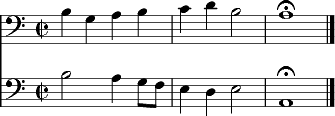

In [10]:
monad._score.measures(54,56).show()

The meaning of the DataFrame becomes crystal clear. The ```Parts 0,1``` label indicates between which parts the vertical intervals were measured, meaning the top part (```Parts 0```) and the bottom part (```Parts 1```). Let's display the DataFrame for our set-theory brothers and sisters:

In [11]:
# Vertical Interval Settings:
vint_settings = {
    'simple or compound':'simple',
    'quality': 'chromatic',        # mod12
    'directed': True,
    'horiz_attach_later': True,
}

# Generating a vertical interval DataFrame:
monad_vints = monad.get_data('vertical_interval', vint_settings)

# Sanity check:
monad_vints.tail(9).T

,,212.0,213.0,214.0,215.0,215.5,216.0,217.0,218.0,220.0
Indexer,Parts,,,,,,,,,
interval.IntervalIndexer,"0,1",0,-4,0,4,6,8,0,7,0


... Can I get an _Amen_? But how does the vertical interval DataFrame look like if there are three voices? Back to the drawing board: 

In [58]:
# Importing a symbolic music file into the analysis script:
file_name = ('Book-3_Jacob-Obrecht_Parce-Domine_p-327_p-328.xml')
# We do not need to re-specify the path, we re-use the previous one.

# Import Obrecht's _Parce Domine_:
obrecht = Importer(path + file_name)

# Vertical Interval Settings:
vint_settings = {
    'simple or compound': 'compound', 
    'quality': True, 
    'directed': True,
    'horiz_attach_later': True,
    'mp': False
}

# Extract all vertical intervals from _Parce Domine_ into a new DataFrame
obrecht_vints = obrecht.get_data('vertical_interval', vint_settings)

# Sanity Checking our work:
obrecht_vints.tail(11).T

168.0 169.0 169.5 170.0 171.0 172.0 172.5  \
Indexer                  Parts                                             
interval.IntervalIndexer 0,1     -M3   -P4   -m3    P1   -M3   -P4   -m3   
                         0,2      m3    m3    P4    P5    m6    P5    P5   
                         1,2      P5    m6    m6    P5    P8    P8    m7   

                               173.0 174.0 175.0 176.0  
Indexer                  Parts                          
interval.IntervalIndexer 0,1     -m3   -M2   -m3    P1  
                         0,2      P4    P4    M3    P8  
                         1,2      m6    P5    P5    P8

As we can see all possible vertical interval combinations between the three voices have been accounted for. Here is another quick look at the same excerpt in the more familiar format with our little helper ```music21```:

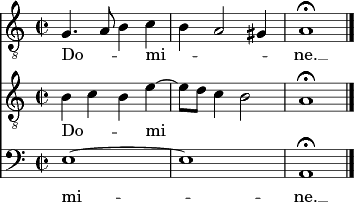

In [59]:
obrecht._score.measures(43,45).show()

At onset 168.0 the vertical interval between the top and middle voice (```0,1```) is a negative (voices are crossing) Major 3rd. The vertical interval between the top and the bottom voice (```0,2```) is a minor 3rd, wereas the vertical interval between the middle and the bottom part (```1,2```) is a Perfect 5th.

But what if we want to check successive intervals (vertical, or horizontal) at different temporal intervals, in order to examine larger scale intervallic motions?

## The Offset Indexer

As was the case with the other indexers we load the importer into our analysis script via ```from vis.models.indexed_piece import Importer```. We then use the ```noterest.NoteRestIndexer``` as an argument for our ```get_data()``` method the following (we are going to re-use the our previously imported ```chant``` and ```obrecht``` scores) way: 

In [60]:
# NoteRest indexing our score into a pandas DataFrame:
chant_indexed = chant.get_data('noterest')

We will have to specify by what value we would like to "offset" our DataFrame:

In [61]:
# Specifying Offset Indexer Settings:
offset_settings = {
    'quarterLength': 4.0
}

With the step completed we can place our offset score into a new DataFrame the following way:

In [62]:
# Passing the settings to the Offset Indexer: 
chant_offset = chant.get_data('offset', data=chant_indexed, settings=offset_settings)

# Looking at the Offset DataFrame:
chant_offset.head().T

,,0.0,4.0,8.0,12.0,16.0
Indexer,Parts,,,,,
offset.FilterByOffsetIndexer,0,C3,E3,D3,E3,A2


We can pull in the non-offset score and compare:

In [63]:
# Comparing the non-offset DataFrame:
chant_indexed.head(17).T

,,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0
Indexer,Parts,,,,,,,,,,,,,,,,,
noterest.NoteRestIndexer,0,C3,G2,A2,A2,E3,F3,E3,E3,D3,C3,D3,E3,E3,D3,C3,D3,A2


When we can compare the onsets, we will see that the offset indexer has reduced the score to looking at every fourth onset. Can we also apply the offset indexer to intervals? Yes! Observe the following example:

In [64]:
# Getting an offset DataFrame for horizontal intervals:
chant_offset_hints = chant.get_data('offset', data=chant_hints, settings=offset_settings)

# Sanity checking the horizontal offset DataFrame:
chant_offset_hints.head().T

,,0.0,4.0,8.0,12.0,16.0
Indexer,Parts,,,,,
offset.FilterByOffsetIndexer,0,-5,1,-2,-2,5


And, and what about vertical intervals? Similar procedure:

In [73]:
# Getting an offset DataFrame for vertical intervals:
# obrecht_offset_vints = obrecht.get_data('offset', data=obrecht_vints, settings=offset_settings)
# The offset indexer does not seem to be working with vertical interval DataFrames

#### << [1_Getting_Started_with_VIS.ipynb](1_Getting_Started_with_VIS.ipynb) | [3_The_NGram_Indexer.ipynb](3_The_NGram_Indexer.ipynb) >>

- [1_Getting_Started_with_VIS.ipynb](1_Getting_Started_with_VIS.ipynb)
- [2_Interval_Indexers.ipynb](2_Interval_Indexers.ipynb)
- [3_The_NGram_Indexer.ipynb](3_The_NGram_Indexer.ipynb)
- [4_Processing_Multiple_Files.ipynb](4_Processing_Multiple_Files.ipynb)
- [5_Data_Wrangling_Results.ipynb](5_Data_Wrangling_Results.ipynb)
- [6_Appendix.ipynb](6_Appendix.ipynb)